# Bayesian modeling with beta distribution conjugate priors

To review the general setup for Bayesian distribution modeling, we have:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

Which can also be written as:

### $$posterior = likelihood * prior$$

*Where the posterior is an update of our prior belief, given the data observed.*

---

### 1. Write functions to calculate the binomial likelihood and log likelihood

The binomial likelihood is defined as:

### $$likelihood(\;p\;|\;n,k\;) = \binom{n}{k}p^k(1-p)^{n-k}$$

Because the original can break easily with high counts, the log likelihood is often used in its place:

### $$ln(likelihood) = ln\binom{n}{k}+k*ln(p)+(n-k)*ln(1-p)$$

Your functions should:

1. Take a probability (p), number of trials (n), and number of successes (k)
2. Return a likelihood for the trials and successes at that probability 

Recall that `np.log()` can be used for natural log. `np.exp()` is useful for getting your likelihood out when the log-likelihood function is done computing. `scipy.misc.comb()` can get the combinations.

In [5]:
import numpy as np
from scipy.misc import comb

In [23]:
def prob_k (p,n,k):
    # prob of at k heads:
    likely = comb(n,k) * (p**k) * ((1-p)**(n-k))
    return likely

def log_prob_k(p,n,k):
    # prob of at k heads:
    log_p = np.log(comb(n,k)) + k*np.log(p) + (n-k)*np.log(1-p)
    return np.exp(log_p)

### 2. Calculate likelihoods using both functions for:

    n=10, k=3
    n=10, k=7
    n=20, k=15
    n=50, k=9
    n=70, k=50
    n=100, k=96
    
For probabilities:

    p = [0.05, 0.5, 0.95]

In [24]:
nks = []
nks.append([10,3])
nks.append([10,7])
nks.append([20,15])
nks.append([50,9])
nks.append([70,50])
nks.append([100,96])
P = [0.05, 0.5, 0.95]

for p in P:
    for item in nks:
        n = item[0]
        k = item[1]
        print "For prob: %.2f, n: %.2f, and k: %.2f the likely is : %.6f and log likely is: %.6f" %  (p,n,k, prob_k(p,n,k), log_prob_k(p,n,k))


For prob: 0.05, n: 10.00, and k: 3.00 the likely is : 0.010475 and log likely is: 0.010475
For prob: 0.05, n: 10.00, and k: 7.00 the likely is : 0.000000 and log likely is: 0.000000
For prob: 0.05, n: 20.00, and k: 15.00 the likely is : 0.000000 and log likely is: 0.000000
For prob: 0.05, n: 50.00, and k: 9.00 the likely is : 0.000597 and log likely is: 0.000597
For prob: 0.05, n: 70.00, and k: 50.00 the likely is : 0.000000 and log likely is: 0.000000
For prob: 0.05, n: 100.00, and k: 96.00 the likely is : 0.000000 and log likely is: 0.000000
For prob: 0.50, n: 10.00, and k: 3.00 the likely is : 0.117188 and log likely is: 0.117188
For prob: 0.50, n: 10.00, and k: 7.00 the likely is : 0.117188 and log likely is: 0.117188
For prob: 0.50, n: 20.00, and k: 15.00 the likely is : 0.014786 and log likely is: 0.014786
For prob: 0.50, n: 50.00, and k: 9.00 the likely is : 0.000002 and log likely is: 0.000002
For prob: 0.50, n: 70.00, and k: 50.00 the likely is : 0.000137 and log likely is: 0.

---

## The beta distribution

[The beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is the appropriate prior distribution for modeling Bernoulli processes (occurrences of successes or failures, etc.). It is a model of the random behavior of data related to percentages, rates, proportions, etc.

The beta distribution takes two parameters: $Beta(\alpha,\beta)$

The $\alpha$ or **alpha** parameter can be thought of as the number of `successes - 1`

The $\beta$ or **beta** parameter can be thought of as the number of `failures - 1`

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/650px-Beta_distribution_pdf.svg.png" alt="betapdf" style="width: 400px;"/>

---

### 3. Plot beta probability density functions

Use the `scipy.stats.beta` object to calculate the probability density of the beta function across a range of points.

Make one plot for each of the n, k pairs you calculated the likelihood for above (converting them into success, failure pairs for the alpha, beta parameters). Plot the probability density function values across a range of probabilities between 0 and 1.

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.beta.html

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.stats import beta

In [31]:
prob_range = np.linspace(0.01, 0.99, 100)

0.05 10 3 0.0104750594414
0.05 10 7 8.037890625e-08
0.05 20 15 3.66110218964e-16
0.05 50 9 0.000597421393598
0.05 70 50 5.15439703965e-49
0.05 100 96 4.03122093054e-119
0.5 10 3 0.1171875
0.5 10 7 0.1171875
0.5 20 15 0.0147857666016
0.5 50 9 2.22527214433e-06
0.5 70 50 0.000137121592955
0.5 100 96 3.09330110308e-24
0.95 10 3 8.037890625e-08
0.95 10 7 0.0104750594414
0.95 20 15 0.00224464601012
0.95 50 9 7.18067945185e-45
0.95 70 50 1.18791645303e-10
0.95 100 96 0.17814264157


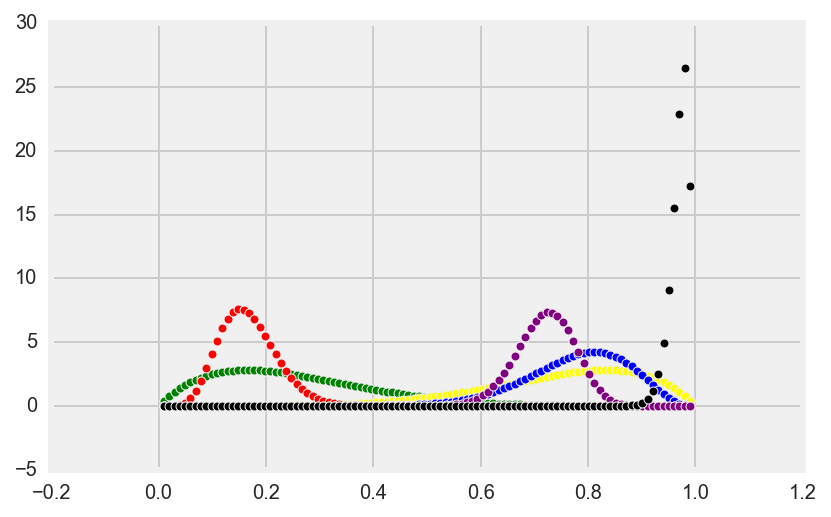

In [52]:
colors = ['red','yellow','orange','blue','green','purple','brown','black']

for p in P:
    for item in nks:
        n = item[0]
        k = item[1]
        lp = log_prob_k(p,n,k)
        success = k-1
        failure = n-k-1
        print p, n,k, lp
        bdf = beta.pdf(prob_range, success, failure)
        plt.scatter(prob_range, bdf, c=colors[np.random.randint(0,len(colors))])


---

## The beta and "conjugate priors"

The beta distribution is a **conjugate prior** for the binomial (and the beta) distributions. What does this mean?

Take the calculation of the posterior distribution with a binomial likelihood function (any binary outcome data):

### $$\text{beta posterior} = \text{binomial likelihood} * \text{beta prior}$$

**The beta distribution being a "conjugate prior" of the binomial likelihood guarantees that the posterior distribution will also be a beta distribution.**

This is also true when the likelihood is a beta likelihood:

### $$\text{beta posterior} = \text{beta likelihood} * \text{beta prior}$$

Again, the posterior is guaranteed to be a beta distribution.

Conjugate priors are extremely useful for calculating posteriors directly. Unfortunately, in many modeling scenarios we do not have the convenience of a conjugate prior. This is where methods like MCMC will come into play down the line.

---

## Bayesian analysis of batting averages

Load in the simple batting avergage data for players below. There are just four fields in the dataset: the player's name, their times at bat, their hits, and their batting average.

[This section of the lab is a partial replication of this exercise in R, if you're interested.](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/) But I took out the "empirical bayes" part because it's not technically a "correct" interpretation of Bayesian statistical analysis.

In [70]:
hits = pd.read_csv('/Users/tlee010/desktop/DSI-SF-2-timdavidlee/datasets/baseball_hits/career_hits.csv')

In [71]:
hits.head()

,name,hits,at_bat,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614


---

### 4. Find the top and bottom 3 hitters according to their average.

What is wrong with using the average to find the 3 best and 3 worst hitters?

In [72]:
hits.sort_values('average', ascending=False).head(3)

,name,hits,at_bat,average
5853,John Mohardt,1,1,1.0
9303,Al Wright,1,1,1.0
359,Jeff Banister,1,1,1.0


In [73]:
hits.sort_values('average', ascending=True).head(3)

,name,hits,at_bat,average
1494,Larry Ciaffone,0,5,0.0
7303,Jay Rogers,0,8,0.0
2552,Ferd Eunick,0,2,0.0


In [74]:
# the issue is that there are too few at bats per person for the average to make sense

---

### 5. Set up prior belief for hits

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260.

Let's make it simple and say that our prior belief is: out of 100 at-bats we have seen 26 hits. Set up a beta distribution with `alpha=27` and `beta=75`. Plot it with the function from above.

This is our distribution of beliefs on the batting average (probability of hit while at-bat) for MLB players.

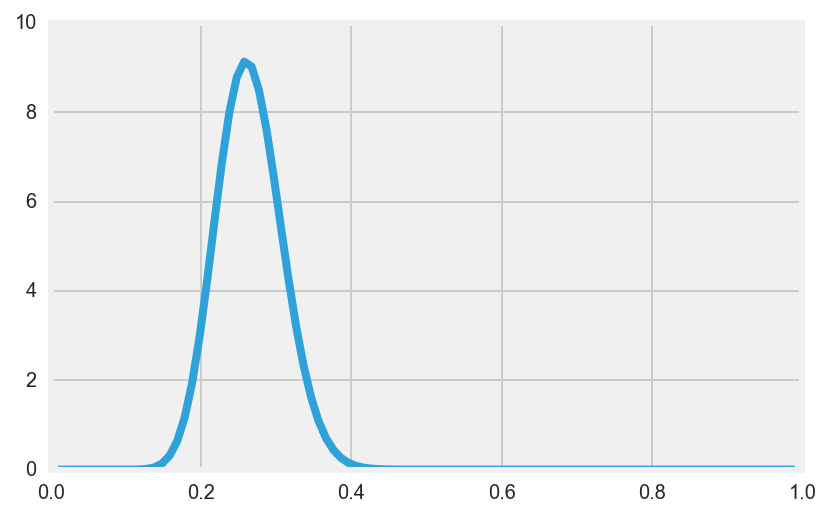

In [75]:
n = 100
k = 26
prob_range = np.linspace(0.01, 0.99, 100)
bdf = beta.pdf(prob_range, 27, 75)
plt.plot(prob_range, bdf)


---

### 6. Calculate the Maximum A Posteriori (MAP) estimate of players' batting averages

The Maximum A Posteriori (MAP) estimate is the posterior distribution counterpart to the Maximum Likelihood Estimate (MLE) commonly used in frequentist statistics. It is the mode of a posterior distribution for a model parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior beta distribution we get from updating our prior distribution with their at-bats and hits.

---

Without going over the math ([at all.. for a simple overview see here](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)), updating our beta distribution prior belief about batting averages with a player's at-bat and hit information will give us a new beta posterior distribution for that player's batting average. 

The for the update is just a matter of adding in our new observations to the alpha and beta parameters of the distribution, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits, prior_misses)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
This process will be extremely useful for stuff like A/B testing, which we will look at later on.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined as:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even really need to use scipy's beta distribution function at all. Just calculate the new alpha (hits) and beta (misses) for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting average.

In [78]:
hits.head()


# #observed_hits = n_hits
# hits['observed_hits'] = hits['hits']

# #observed_misses = n_misses
# hits['observed_misses'] = hits['at_bat'] - hits['hits']

# #beta_prior = Beta(prior_hits, prior_misses)
# hits['beta_prior'] = beta(27,75)

# #beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
# hits['beta_posterior'] = beta(27 + hits['observed_hits'] +1, 75 + hits['observed_misses'] +1 )

hits['MAP'] = hits.apply(lambda x : (27.+x['hits']-1)/(27.+75. +x['at_bat']-2)*1. , axis = 1)

hits.head()

,name,hits,at_bat,average,mode_of_bd,MAP
0,Hank Aaron,3771,12364,0.304998,0.304637,0.304637
1,Tommie Aaron,216,944,0.228814,0.231801,0.231801
2,Andy Abad,2,21,0.095238,0.231405,0.231405
3,John Abadie,11,49,0.224490,0.248322,0.248322
4,Ed Abbaticchio,772,3044,0.253614,0.253817,0.253817


---

### 7. Look up the top and bottom batters according to the MAP

In [80]:
hits.sort_values('MAP',ascending=False).head(5)

,name,hits,at_bat,average,mode_of_bd,MAP
3938,Rogers Hornsby,2930,8173,0.358497,0.357307,0.357307
4118,Shoeless Joe Jackson,1772,4981,0.355752,0.353867,0.353867
2109,Ed Delahanty,2596,7505,0.345903,0.344773,0.344773
3475,Billy Hamilton,2158,6268,0.344288,0.342965,0.342965
3663,Harry Heilmann,2660,7787,0.341595,0.340560,0.340560


In [81]:
hits.sort_values('MAP',ascending=False).tail(5)

,name,hits,at_bat,average,mode_of_bd,MAP
598,Bill Bergen,516,3028,0.170410,0.173274,0.173274
3113,Buck Gladmon,56,380,0.147368,0.170833,0.170833
2987,Ed Gastfield,6,88,0.068182,0.170213,0.170213
4322,Mike Jordan,12,125,0.096000,0.168889,0.168889
4031,John Humphries,52,364,0.142857,0.168103,0.168103


In [83]:
hits[hits.at_bat == 1]

,name,hits,at_bat,average,mode_of_bd,MAP
139,Walter Alston,0,1,0.0,0.257426,0.257426
261,Lefty Atkinson,0,1,0.0,0.257426,0.257426
359,Jeff Banister,1,1,1.0,0.267327,0.267327
366,Jim Banning,0,1,0.0,0.257426,0.257426
370,Red Barbary,0,1,0.0,0.257426,0.257426
447,Chris Basak,0,1,0.0,0.257426,0.257426
452,Doc Bass,1,1,1.0,0.267327,0.267327
744,Jack Blott,0,1,0.0,0.257426,0.257426
750,Red Bluhm,0,1,0.0,0.257426,0.257426
775,Charlie Bold,0,1,0.0,0.257426,0.257426


---

### 8. Plot the batting average against the MAP batting average

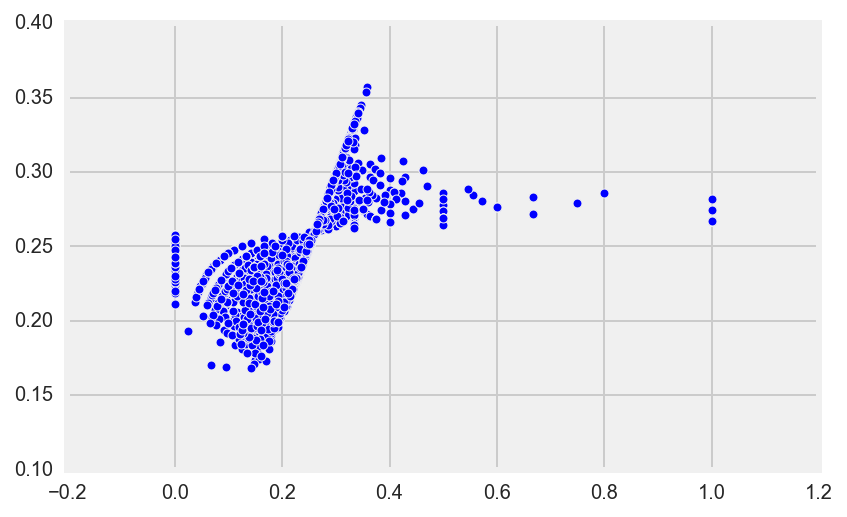

In [82]:
plt.scatter(hits['average'],hits['MAP'])